# Análisis Interactivo - Datawarehouse Rent4you

Este notebook contiene el análisis interactivo de ventas por sucursal del datawarehouse de Rent4you.

In [84]:
import sys
sys.path.append('../scripts')

from analisis_ventas_sucursal import AnalisisVentasSucursal
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Configurar pandas para mostrar más columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 1. Carga y Exploración de Datos

In [85]:
# Crear instancia del analizador
analizador = AnalisisVentasSucursal(data_path='../data/raw/')

# Cargar datos
analizador.cargar_datos()

# Mostrar información básica de los datasets
print('=== INFORMACIÓN DE LOS DATASETS ===')
print(f'Alquileres: {len(analizador.df_alquileres)} registros')
print(f'Sucursales: {len(analizador.df_sucursales)} registros')
print(f'Vehículos: {len(analizador.df_vehiculos)} registros')
print(f'Clientes: {len(analizador.df_clientes)} registros')
print(f'Empleados: {len(analizador.df_empleados)} registros')
print(f'Gastos: {len(analizador.df_gastos)} registros')

Datos cargados exitosamente
=== INFORMACIÓN DE LOS DATASETS ===
Alquileres: 8 registros
Sucursales: 5 registros
Vehículos: 5 registros
Clientes: 5 registros
Empleados: 5 registros
Gastos: 5 registros


In [86]:
# Explorar datos de alquileres
print('=== DATOS DE ALQUILERES ===')
print('\nPrimeras 5 filas:')
display(analizador.df_alquileres.head())

print('\nInformación del dataset:')
analizador.df_alquileres.info()

print('\nEstadísticas descriptivas:')
display(analizador.df_alquileres.describe())

=== DATOS DE ALQUILERES ===

Primeras 5 filas:


,id_alquiler,id_cliente,id_vehiculo,id_sucursal,id_empleado,fecha_inicio,fecha_fin,monto_total,monto_seguro,monto_combustible,estado_alquiler
0,1,1,1,1,2,2021-01-15,2021-01-20,250.0,50.0,30.0,completado
1,2,2,3,3,4,2021-02-10,2021-02-12,180.0,40.0,25.0,completado
2,3,3,2,2,3,2021-03-05,2021-03-10,300.0,60.0,35.0,completado
3,4,4,4,4,5,2021-04-20,2021-04-25,450.0,80.0,50.0,completado
4,5,5,1,1,2,2021-05-15,2021-05-18,200.0,45.0,28.0,completado



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_alquiler        8 non-null      int64  
 1   id_cliente         8 non-null      int64  
 2   id_vehiculo        8 non-null      int64  
 3   id_sucursal        8 non-null      int64  
 4   id_empleado        8 non-null      int64  
 5   fecha_inicio       8 non-null      object 
 6   fecha_fin          8 non-null      object 
 7   monto_total        8 non-null      float64
 8   monto_seguro       8 non-null      float64
 9   monto_combustible  8 non-null      float64
 10  estado_alquiler    8 non-null      object 
dtypes: float64(3), int64(5), object(3)
memory usage: 832.0+ bytes

Estadísticas descriptivas:


,id_alquiler,id_cliente,id_vehiculo,id_sucursal,id_empleado,monto_total,monto_seguro,monto_combustible
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,4.50000,2.625000,2.625000,2.125000,3.125000,246.250000,49.375000,30.250000
std,2.44949,1.407886,1.407886,1.125992,1.125992,99.130145,15.909903,9.422617
min,1.00000,1.000000,1.000000,1.000000,2.000000,150.000000,30.000000,20.000000
25%,2.75000,1.750000,1.750000,1.000000,2.000000,175.000000,38.750000,24.250000
50%,4.50000,2.500000,2.500000,2.000000,3.000000,225.000000,47.500000,29.000000
75%,6.25000,3.250000,3.250000,3.000000,4.000000,285.000000,56.250000,32.750000
max,8.00000,5.000000,5.000000,4.000000,5.000000,450.000000,80.000000,50.000000


In [87]:
# Explorar datos de sucursales
print('=== DATOS DE SUCURSALES ===')
display(analizador.df_sucursales)

print('\nDistribución por ciudad:')
display(analizador.df_sucursales['ciudad'].value_counts())

=== DATOS DE SUCURSALES ===


,id_sucursal,nombre_sucursal,direccion,ciudad,pais,codigo_postal
0,1,Rent4you Centro,Av. Principal 123,Madrid,España,28001
1,2,Rent4you Norte,Calle Norte 456,Madrid,España,28002
2,3,Rent4you Sur,Av. Sur 789,Barcelona,España,8001
3,4,Rent4you Este,Calle Este 321,Valencia,España,46001
4,5,Rent4you Oeste,Av. Oeste 654,Sevilla,España,41001



Distribución por ciudad:


ciudad
Madrid       2
Barcelona    1
Valencia     1
Sevilla      1
Name: count, dtype: int64

## 2. Preprocesamiento de Datos

In [88]:
# Preprocesar datos
analizador.preprocesar_datos()

# Mostrar datos preprocesados
print('=== DATOS PREPROCESADOS ===')
print('\nNuevas columnas agregadas:')
print('- duracion_dias')
print('- año')
print('- mes')
print('- trimestre')

print('\nPrimeras 5 filas con nuevas columnas:')
display(analizador.df_alquileres[['fecha_inicio', 'fecha_fin', 'duracion_dias', 'año', 'mes', 'trimestre']].head())

Datos preprocesados exitosamente
=== DATOS PREPROCESADOS ===

Nuevas columnas agregadas:
- duracion_dias
- año
- mes
- trimestre

Primeras 5 filas con nuevas columnas:


,fecha_inicio,fecha_fin,duracion_dias,año,mes,trimestre
0,2021-01-15,2021-01-20,5,2021,1,1
1,2021-02-10,2021-02-12,2,2021,2,1
2,2021-03-05,2021-03-10,5,2021,3,1
3,2021-04-20,2021-04-25,5,2021,4,2
4,2021-05-15,2021-05-18,3,2021,5,2


## 3. Creación del Datamart

In [89]:
# Crear datamart
datamart = analizador.crear_datamart_ventas()

print(f'=== DATAMART CREADO ===')
print(f'Registros en el datamart: {len(datamart)}')
print(f'Columnas: {len(datamart.columns)}')

print('\nColumnas del datamart:')
for i, col in enumerate(datamart.columns, 1):
    print(f'{i:2d}. {col}')

print('\nPrimeras 3 filas del datamart:')
display(datamart.head(3))

=== DATAMART CREADO ===
Registros en el datamart: 8
Columnas: 29

Columnas del datamart:
 1. id_alquiler
 2. id_cliente
 3. id_vehiculo
 4. id_sucursal
 5. id_empleado
 6. fecha_inicio
 7. fecha_fin
 8. monto_total
 9. monto_seguro
10. monto_combustible
11. estado_alquiler
12. duracion_dias
13. año
14. mes
15. trimestre
16. nombre_sucursal
17. direccion
18. ciudad
19. pais
20. codigo_postal
21. tipo_vehiculo
22. marca
23. modelo
24. categoria_cliente
25. edad
26. genero
27. nombre
28. apellido
29. puesto

Primeras 3 filas del datamart:


,id_alquiler,id_cliente,id_vehiculo,id_sucursal,id_empleado,fecha_inicio,fecha_fin,monto_total,monto_seguro,monto_combustible,estado_alquiler,duracion_dias,año,mes,trimestre,nombre_sucursal,direccion,ciudad,pais,codigo_postal,tipo_vehiculo,marca,modelo,categoria_cliente,edad,genero,nombre,apellido,puesto
0,1,1,1,1,2,2021-01-15,2021-01-20,250.0,50.0,30.0,completado,5,2021,1,1,Rent4you Centro,Av. Principal 123,Madrid,España,28001,coche,Toyota,Corolla,recurrente,35,M,Laura,Fernández,vendedor
1,2,2,3,3,4,2021-02-10,2021-02-12,180.0,40.0,25.0,completado,2,2021,2,1,Rent4you Sur,Av. Sur 789,Barcelona,España,8001,moto,Yamaha,MT-07,nuevo,28,F,Carmen,Ruiz,gerente
2,3,3,2,2,3,2021-03-05,2021-03-10,300.0,60.0,35.0,completado,5,2021,3,1,Rent4you Norte,Calle Norte 456,Madrid,España,28002,coche,Honda,Civic,vip,42,M,Miguel,Torres,vendedor


## 4. Análisis de Ventas por Sucursal

In [90]:
# Realizar análisis de ventas
ventas_sucursal = analizador.analizar_ventas_por_sucursal(datamart)

print('=== ANÁLISIS DE VENTAS POR SUCURSAL ===')
display(ventas_sucursal)

# Ranking de sucursales
print('\n=== RANKING POR INGRESOS TOTALES ===')
ranking_ingresos = ventas_sucursal.sort_values('ingresos_totales', ascending=False)
display(ranking_ingresos[['nombre_sucursal', 'ciudad', 'ingresos_totales', 'num_alquileres']])

print('\n=== RANKING POR NÚMERO DE ALQUILERES ===')
ranking_alquileres = ventas_sucursal.sort_values('num_alquileres', ascending=False)
display(ranking_alquileres[['nombre_sucursal', 'ciudad', 'num_alquileres', 'ingresos_totales']])

=== ANÁLISIS DE VENTAS POR SUCURSAL ===


,id_sucursal,nombre_sucursal,ciudad,ingresos_totales,ingreso_promedio,num_alquileres,total_seguros,total_combustible,duracion_promedio,ingreso_por_dia
0,1,Rent4you Centro,Madrid,600.0,200.0,3,125.0,78.0,4.33,138.568129
1,2,Rent4you Norte,Madrid,460.0,230.0,2,95.0,57.0,3.50,131.428571
2,3,Rent4you Sur,Barcelona,460.0,230.0,2,95.0,57.0,3.00,153.333333
3,4,Rent4you Este,Valencia,450.0,450.0,1,80.0,50.0,5.00,90.000000



=== RANKING POR INGRESOS TOTALES ===


,nombre_sucursal,ciudad,ingresos_totales,num_alquileres
0,Rent4you Centro,Madrid,600.0,3
1,Rent4you Norte,Madrid,460.0,2
2,Rent4you Sur,Barcelona,460.0,2
3,Rent4you Este,Valencia,450.0,1



=== RANKING POR NÚMERO DE ALQUILERES ===


,nombre_sucursal,ciudad,num_alquileres,ingresos_totales
0,Rent4you Centro,Madrid,3,600.0
1,Rent4you Norte,Madrid,2,460.0
2,Rent4you Sur,Barcelona,2,460.0
3,Rent4you Este,Valencia,1,450.0


## 5. Visualizaciones Interactivas

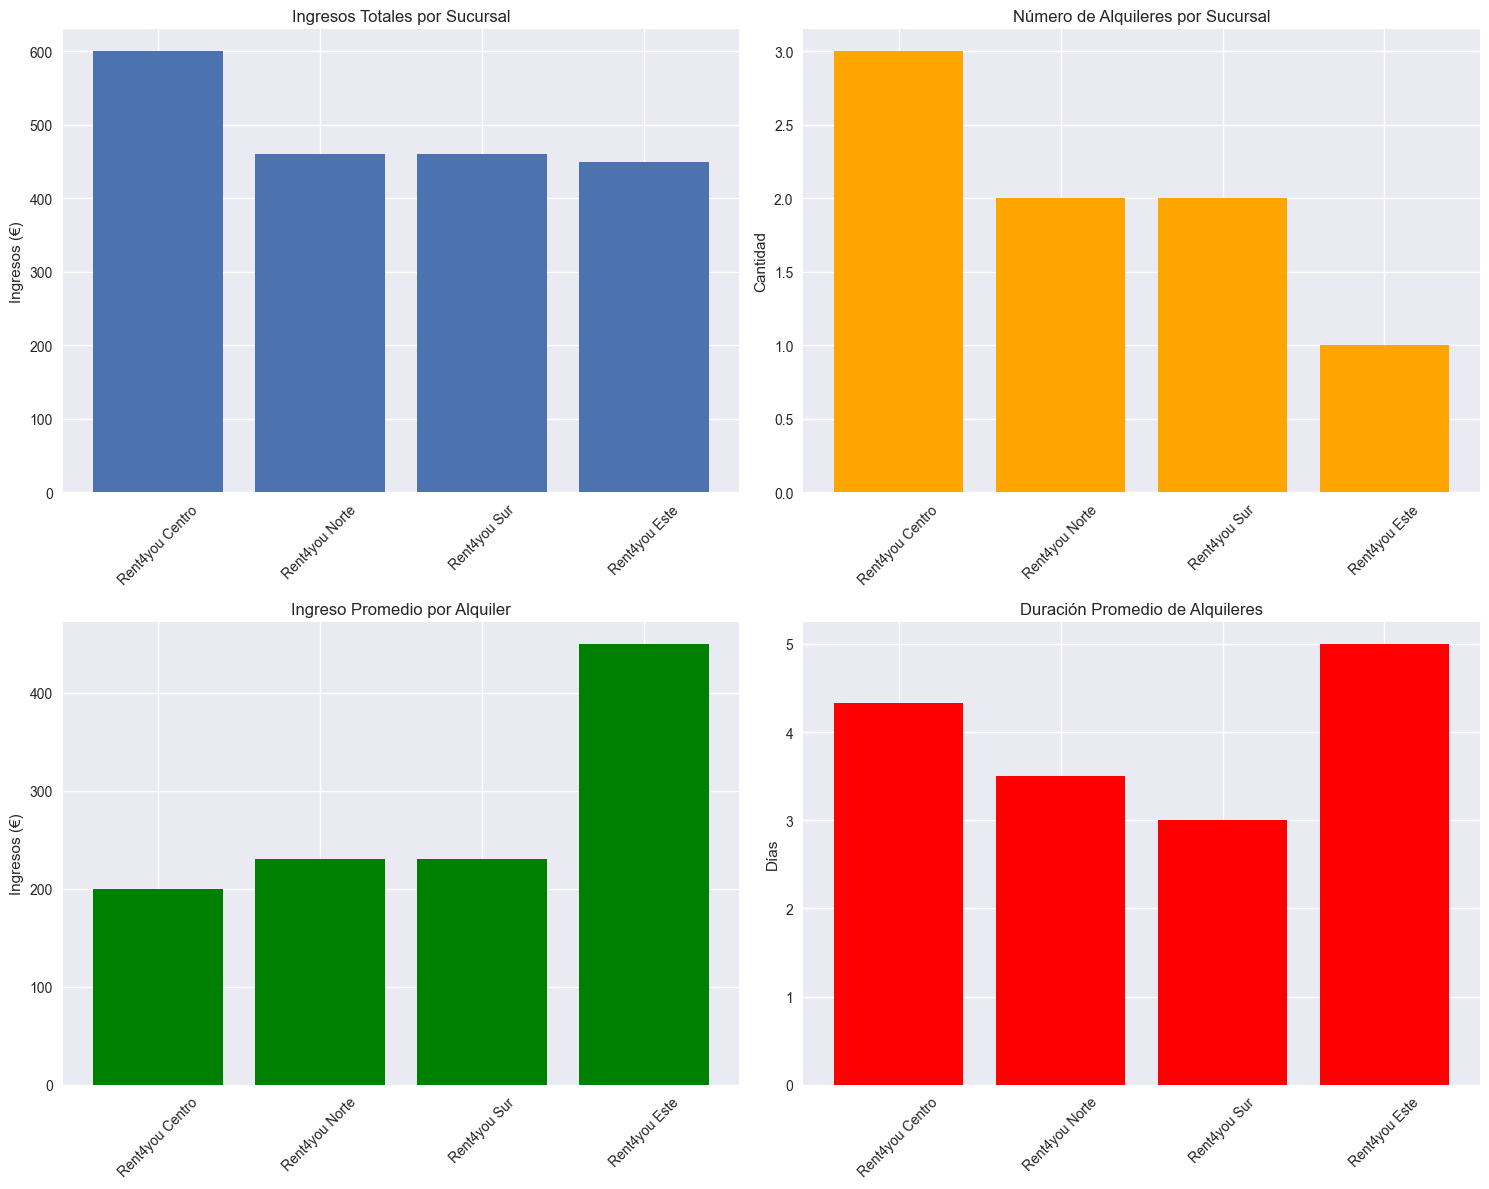

In [91]:
# Generar visualizaciones principales
analizador.generar_visualizaciones(ventas_sucursal)

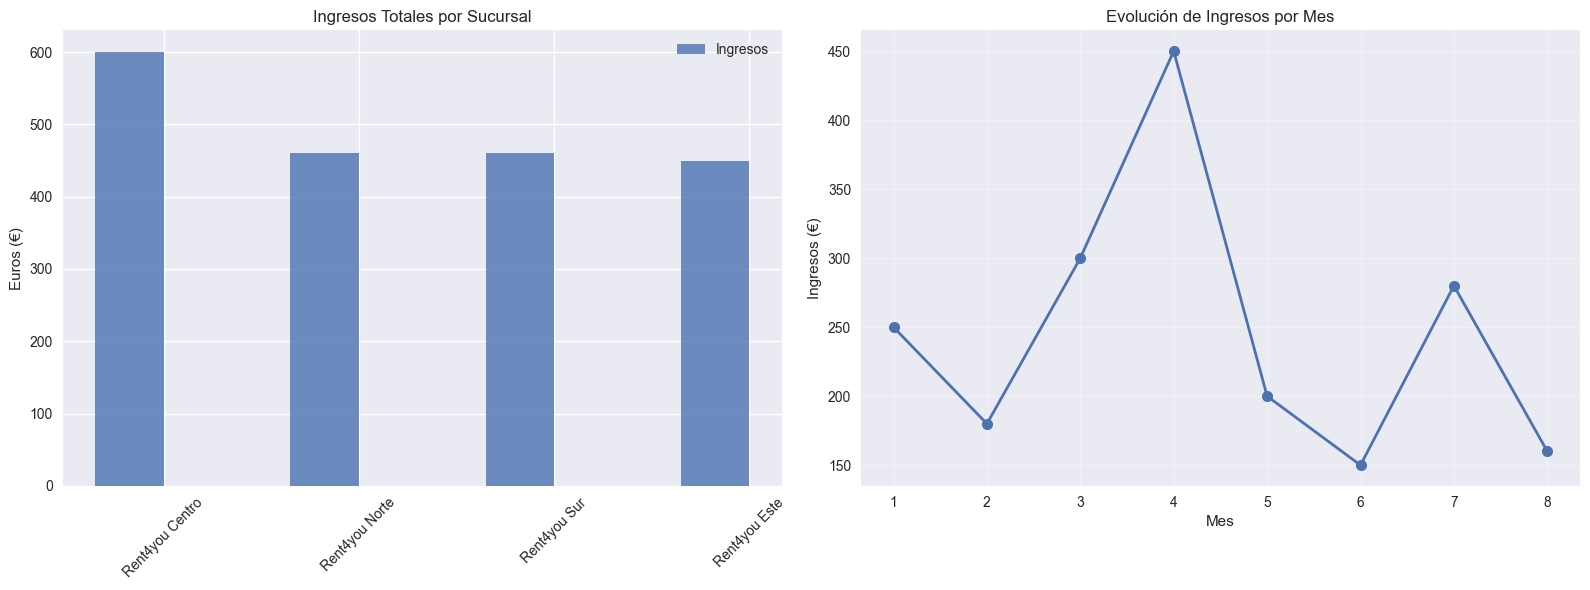

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convertir nombres de sucursales a números
ventas_sucursal['sucursal_num'] = pd.factorize(ventas_sucursal['nombre_sucursal'])[0]

# Visualizaciones adicionales
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Comparación ingresos vs gastos por sucursal
x_pos = ventas_sucursal['sucursal_num']  # Usamos los números para la posición en X
width = 0.35

axes[0].bar(x_pos - width/2, ventas_sucursal['ingresos_totales'], width, label='Ingresos', alpha=0.8)
axes[0].set_title('Ingresos Totales por Sucursal')
axes[0].set_ylabel('Euros (€)')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(ventas_sucursal['nombre_sucursal'], rotation=45)  # Etiquetas legibles
axes[0].legend()

# Gráfico 2: Ingresos por mes
ingresos_mes = datamart.groupby('mes')['monto_total'].sum()
axes[1].plot(ingresos_mes.index, ingresos_mes.values, marker='o', linewidth=2, markersize=8)
axes[1].set_title('Evolución de Ingresos por Mes')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Ingresos (€)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Análisis por Categoría de Cliente

=== ANÁLISIS POR CATEGORÍA DE CLIENTE ===
Mapeo de categorías: {'nuevo': np.int64(0), 'recurrente': np.int64(1), 'vip': np.int64(2)}


,categoria_cliente_num,nombre_sucursal,monto_total_sum,monto_total_mean,monto_total_count,duracion_dias_mean
0,0,Rent4you Centro,200.0,200.0,1,3.0
1,0,Rent4you Sur,460.0,230.0,2,3.0
2,1,Rent4you Centro,400.0,200.0,2,5.0
3,1,Rent4you Este,450.0,450.0,1,5.0
4,2,Rent4you Norte,460.0,230.0,2,3.5


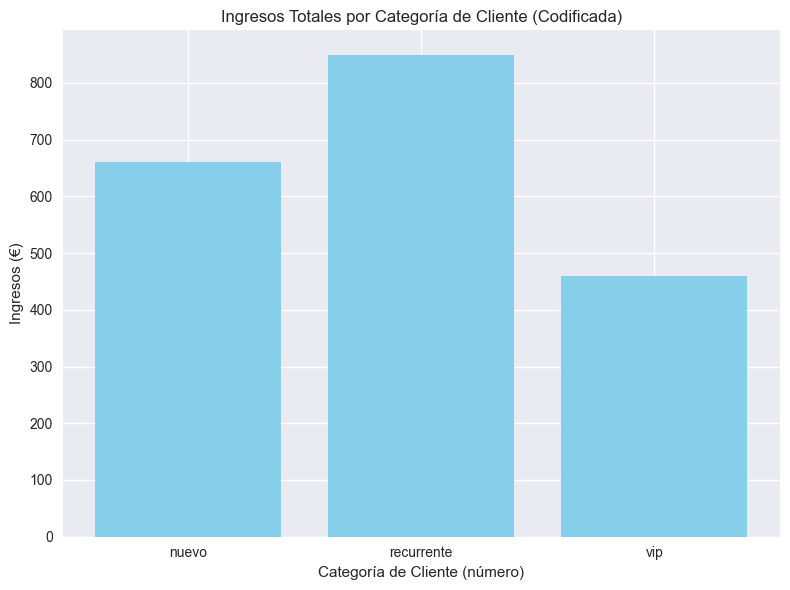

In [96]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

print('=== ANÁLISIS POR CATEGORÍA DE CLIENTE ===')

# 1. Codificar la columna 'categoria_cliente'
le = LabelEncoder()
datamart['categoria_cliente_num'] = le.fit_transform(datamart['categoria_cliente'])

# Ver el mapeo de categorías a números
categoria_dict = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapeo de categorías:", categoria_dict)

# 2. Análisis agrupado usando la categoría numérica
cliente_analisis = datamart.groupby(['categoria_cliente_num', 'nombre_sucursal']).agg({
    'monto_total': ['sum', 'mean', 'count'],
    'duracion_dias': 'mean'
}).round(2)

# 3. Renombrar columnas multi-índice
cliente_analisis.columns = ['_'.join(col).strip() for col in cliente_analisis.columns]
cliente_analisis = cliente_analisis.reset_index()

# 4. Mostrar tabla
display(cliente_analisis)

# 5. Gráfico: ingresos por categoría (codificada)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ingresos_categoria = datamart.groupby('categoria_cliente_num')['monto_total'].sum()
ax.bar(ingresos_categoria.index, ingresos_categoria.values, color='skyblue')
ax.set_title('Ingresos Totales por Categoría de Cliente (Codificada)')
ax.set_xlabel('Categoría de Cliente (número)')
ax.set_ylabel('Ingresos (€)')
ax.set_xticks(list(categoria_dict.values()))
ax.set_xticklabels(list(categoria_dict.keys()))  # Para mostrar las etiquetas originales

plt.tight_layout()
plt.show()


## 7. Análisis de Eficiencia de Empleados

=== ANÁLISIS DE EFICIENCIA DE EMPLEADOS ===

Ranking de empleados por ingresos totales:


,id_empleado,nombre,apellido,puesto,nombre_sucursal,ingresos_totales,ingreso_promedio,num_ventas,eficiencia
0,2,Laura,Fernández,vendedor,Rent4you Centro,600.0,200.0,3,200.0
1,3,Miguel,Torres,vendedor,Rent4you Norte,460.0,230.0,2,230.0
2,4,Carmen,Ruiz,gerente,Rent4you Sur,460.0,230.0,2,230.0
3,5,David,Moreno,vendedor,Rent4you Este,450.0,450.0,1,450.0


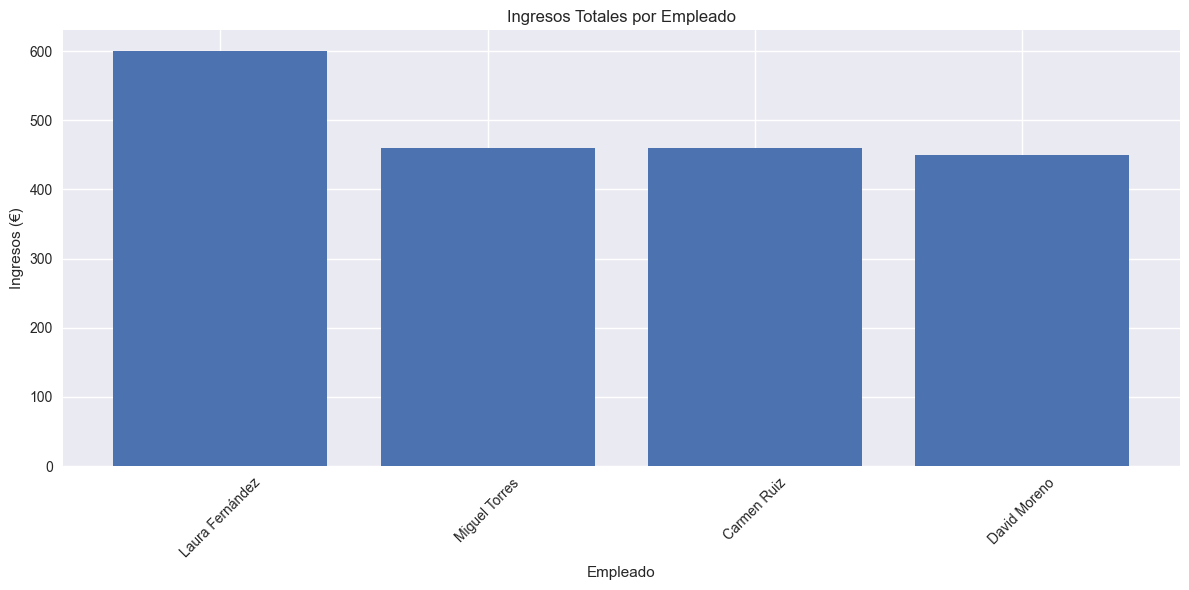

In [94]:
# Análisis de eficiencia de empleados
print('=== ANÁLISIS DE EFICIENCIA DE EMPLEADOS ===')

empleado_analisis = datamart.groupby(['id_empleado', 'nombre', 'apellido', 'puesto', 'nombre_sucursal']).agg({
    'monto_total': ['sum', 'mean', 'count']
}).round(2)

empleado_analisis.columns = ['ingresos_totales', 'ingreso_promedio', 'num_ventas']
empleado_analisis = empleado_analisis.reset_index()

# Calcular eficiencia (ingresos por venta)
empleado_analisis['eficiencia'] = empleado_analisis['ingresos_totales'] / empleado_analisis['num_ventas']

print('\nRanking de empleados por ingresos totales:')
display(empleado_analisis.sort_values('ingresos_totales', ascending=False))

# Visualización de eficiencia
plt.figure(figsize=(12, 6))

empleado_names = empleado_analisis['nombre'] + ' ' + empleado_analisis['apellido']
plt.bar(empleado_names, empleado_analisis['ingresos_totales'])
plt.title('Ingresos Totales por Empleado')
plt.xlabel('Empleado')
plt.ylabel('Ingresos (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Generación de Reportes

In [ ]:
# Generar reporte final
reporte = analizador.generar_reporte(ventas_sucursal)

print('=== REPORTE GENERADO ===')
print('Archivos creados en ../data/processed/:')
print('- datamart_ventas_sucursal.csv')
print('- analisis_ventas_sucursal.csv')
print('- analisis_ventas_visualizacion.png')
print('- reporte_analisis.md')

print('\n=== VISTA PREVIA DEL REPORTE ===')
print(reporte[:1000] + '...')

=== REPORTE GENERADO ===
Archivos creados en ../data/processed/:
- datamart_ventas_sucursal.csv
- analisis_ventas_sucursal.csv
- analisis_ventas_visualizacion.png
- reporte_analisis.md

=== VISTA PREVIA DEL REPORTE ===

# REPORTE DE ANÁLISIS DE VENTAS POR SUCURSAL - RENT4YOU

## Resumen Ejecutivo
Fecha de análisis: 2025-06-19 16:15:12

## Métricas Principales

### Ranking de Sucursales por Ingresos:
nombre_sucursal    ciudad  ingresos_totales
Rent4you Centro    Madrid             600.0
 Rent4you Norte    Madrid             460.0
   Rent4you Sur Barcelona             460.0
  Rent4you Este  Valencia             450.0

### Estadísticas Generales:
- Total de sucursales analizadas: 4
- Ingresos totales de la red: €1,970.00
- Promedio de ingresos por sucursal: €492.50
- Total de alquileres: 8

### Sucursal con Mejor Performance:
- Mayores ingresos: Rent4you Centro
- Mayor número de alquileres: Rent4you Centro
- Mayor ingreso promedio: Rent4you Este

## Recomendaciones:
1. Analizar las mejore